In [1]:
%run 1_Data_Cleaning.ipynb

# Exploratory Analysis

### 1. Payment Type 

In [2]:
order_payment_sorted

,order_id,payment_type,payment_value,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,72.19,2
1,00018f77f2f0320c557190d7a144bdd3,credit_card,259.83,3
2,000229ec398224ef6ca0657da4fc703e,credit_card,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,credit_card,25.78,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,218.04,3
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,boleto,343.40,1
99436,fffcd46ef2263f404302a634eb57f7eb,boleto,386.53,1
99437,fffce4705a9662cd70adb13d4a31832d,credit_card,116.85,3
99438,fffe18544ffabc95dfada21779c9644f,credit_card,64.71,3


In [3]:
print("Payment Type Count:")

print(order_payment_sorted['payment_type'].value_counts())

Payment Type Count:
credit_card    75387
boleto         19784
voucher         2739
debit_card      1527
Name: payment_type, dtype: int64


<Axes: xlabel='payment_type', ylabel='Count'>

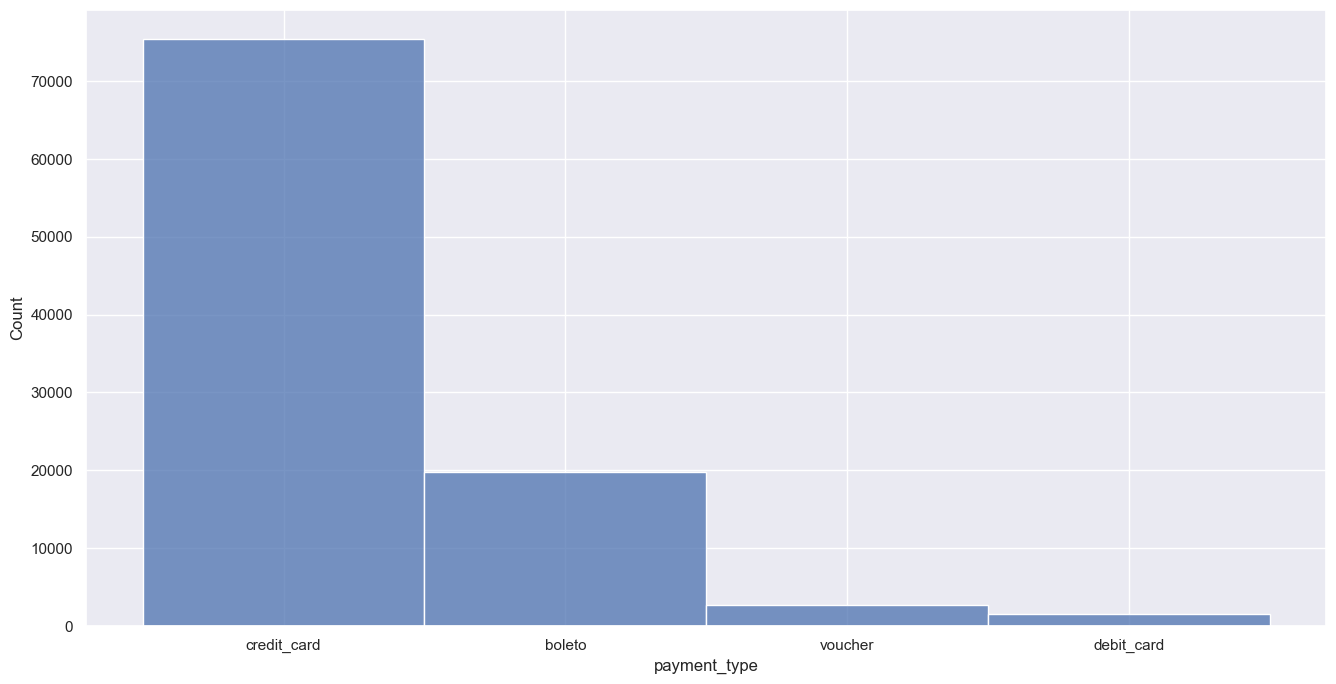

In [4]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = order_payment_sorted['payment_type'])

### 2. No. of unique users in total  

In [5]:
customer_file = pd.read_csv('olist_customers_dataset.csv')
customer_file

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
customer_file['customer_unique_id'].nunique()

96096

### 3. No. of unique item categories 

In [7]:
clean_df['product_category_name_english'].nunique()

71

### 4. No. of unique sellers 

In [8]:
seller_file = pd.read_csv('olist_sellers_dataset.csv')
seller_file['seller_id'].nunique()

3095

### 5. Mean seller revenue 

In [9]:
clean_df['payment_value'].sum()/seller_file['seller_id'].nunique()

6597.185185783522

### 6. Period of time

In [10]:
max(order_file['order_time']) - min(order_file['order_time'])

Timedelta('772 days 20:15:00')

### 7. Review score spread

In [11]:
print("Review Score Count: ")
print(clean_df['review_score'].value_counts())

Review Score Count: 
5    63626
4    21381
1    14787
3     9544
2     3984
Name: review_score, dtype: int64


<Axes: xlabel='review_score', ylabel='Count'>

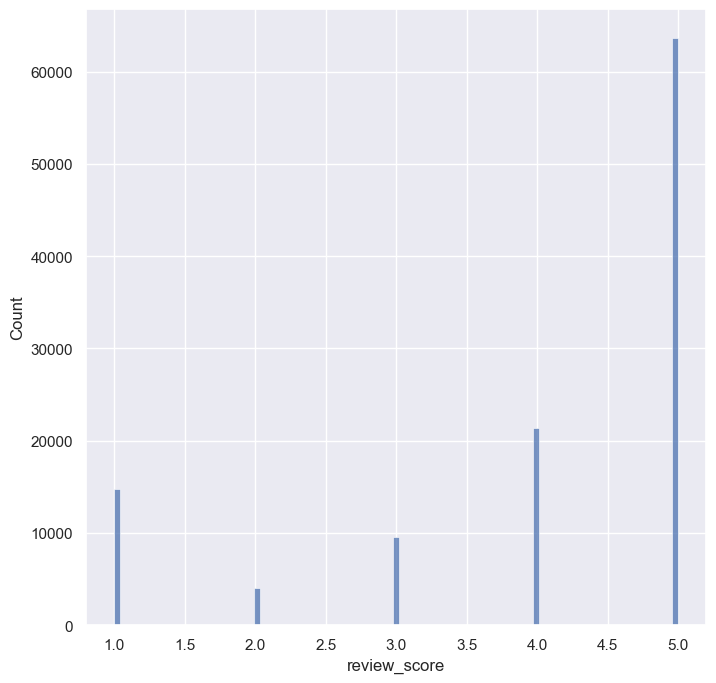

In [12]:
f = plt.figure(figsize=(8, 8))
sb.histplot(clean_df['review_score'])

### Sales Count

In [13]:
order_items_file = pd.read_csv('olist_order_items_dataset.csv')
orders_file = pd.read_csv('olist_orders_dataset.csv')
order_date_df = pd.merge(order_items_file, orders_file, how = "left", on = "order_id")
order_date_df = pd.DataFrame(order_date_df[["order_id", "product_id", "seller_id", "price", "customer_id", "order_purchase_timestamp"]])

order_date_df['order_purchase_timestamp'] = pd.to_datetime(order_date_df['order_purchase_timestamp'], format = '%d/%m/%Y %H:%M')
for index, row in order_date_df.iterrows():
    order_date_df.at[index, 'PurchasedYear'] = row["order_purchase_timestamp"].year

order_date_df['PurchasedYear'] = order_date_df['PurchasedYear'].astype('int64')

Total Number of Products sold per year:
2018    61416
2017    50864
2016      370
Name: PurchasedYear, dtype: int64


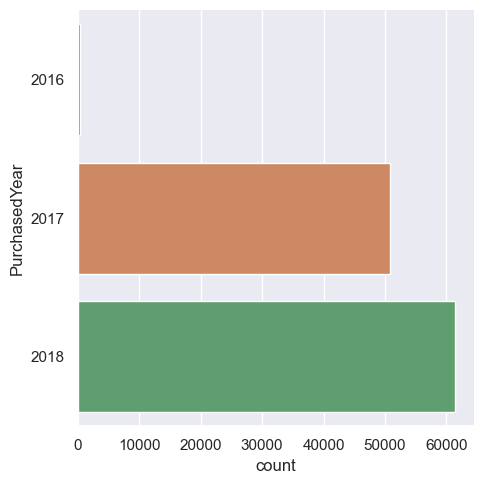

In [14]:
print("Total Number of Products sold per year:")

print(order_date_df["PurchasedYear"].value_counts())
sb.catplot(y = "PurchasedYear", data = order_date_df, kind = "count")

### Number of customers per year

Number of Customers per year:
2018    54011
2017    45101
2016      329
Name: PurchasedYear, dtype: int64


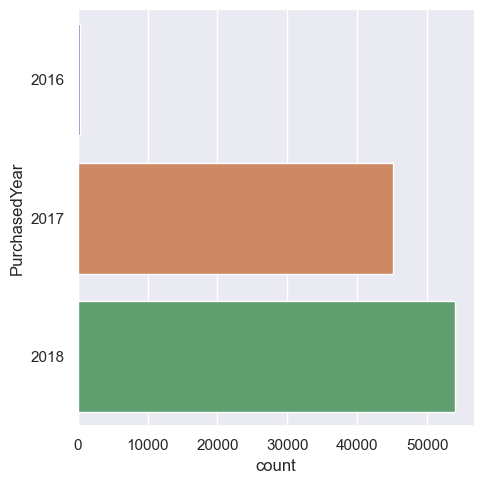

In [15]:
print("Number of Customers per year:")

print(order_cust["PurchasedYear"].value_counts())
sb.catplot(y = "PurchasedYear", data = order_cust, kind = "count")

### Review Score Summary Statistics 

In [16]:
products_file = pd.read_csv('olist_products_dataset.csv')
order_items_file = pd.read_csv('olist_order_items_dataset.csv')
product_order_df = pd.merge(order_items_file, products_file, how = "left", on = "product_id")

In [17]:
review_file = pd.read_csv('olist_order_reviews_dataset.csv')
review_file = pd.DataFrame(review_file[["order_id", "review_score"]])

In [18]:
product_order_review_df = pd.merge(product_order_df,review_file, how="left",on="order_id")
product_order_review_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/9/2017 9:45,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3/5/2017 11:05,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/1/2018 14:48,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/8/2018 10:10,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/2/2017 13:57,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2/5/2018 4:11,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,5
113318,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/7/2018 4:31,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,5
113319,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,5
113320,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/8/2017 0:04,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,5


In [19]:
main_df =  pd.DataFrame(product_order_review_df[["product_id", "price", "freight_value", "product_description_lenght", "product_photos_qty", "product_weight_g",  "product_length_cm", "product_height_cm", "product_width_cm", "review_score"]])
main_df

,product_id,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,598.0,4.0,650.0,28.0,9.0,14.0,5
1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,239.0,2.0,30000.0,50.0,30.0,40.0,4
2,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,695.0,2.0,3050.0,33.0,13.0,33.0,5
3,7634da152a4610f1595efa32f14722fc,12.99,12.79,480.0,1.0,200.0,16.0,10.0,15.0,4
4,ac6c3623068f30de03045865e4e10089,199.90,18.14,409.0,1.0,3750.0,35.0,40.0,30.0,5
...,...,...,...,...,...,...,...,...,...,...
113317,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41,1002.0,3.0,10150.0,89.0,15.0,40.0,5
113318,32e07fd915822b0765e448c4dd74c828,350.00,36.53,232.0,1.0,8950.0,45.0,26.0,38.0,5
113319,72a30483855e2eafc67aee5dc2560482,99.90,16.95,869.0,1.0,967.0,21.0,24.0,19.0,5
113320,9c422a519119dcad7575db5af1ba540e,55.99,8.72,1306.0,1.0,100.0,20.0,20.0,20.0,5


In [20]:
main_df = main_df.groupby(['product_id'],as_index = False).agg({'price': 'mean', 'freight_value': 'mean', 'product_description_lenght': 'mean', 'product_photos_qty': 'mean', 'product_weight_g':'mean' ,'product_height_cm': 'mean', 'product_width_cm': 'mean', 'review_score': 'mean', 'review_score': 'mean'})

In [21]:
main_df

,product_id,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,product_height_cm,product_width_cm,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.590,596.0,6.0,300.0,16.0,16.0,5.0
1,00088930e925c41fd95ebfe695fd2655,129.90,13.930,752.0,4.0,1225.0,10.0,26.0,4.0
2,0009406fd7479715e4bef61dd91f2462,229.00,13.100,266.0,2.0,300.0,15.0,35.0,1.0
3,000b8f95fcb9e0096488278317764d19,58.90,19.600,364.0,3.0,550.0,24.0,12.0,5.0
4,000d9be29b5207b54e86aa1b1ac54872,199.00,19.270,613.0,4.0,250.0,11.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,114.99,27.705,842.0,1.0,1400.0,25.0,15.0,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,90.00,7.890,643.0,1.0,58.0,16.0,11.0,4.0
32948,fff9553ac224cec9d15d49f5a263411f,32.00,11.850,328.0,3.0,150.0,13.0,11.0,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.99,11.774,501.0,5.0,150.0,4.0,13.0,5.0


In [22]:
product_order_review_df['product_id'].value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    491
422879e10f46682990de24d770e7f83d    487
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    391
                                   ... 
2b80699b25d49f30774b88420a36c55d      1
b462acd19b311a321ce9aa9eb22b2bac      1
b532439c5052d3a85fcfedbe20e0a107      1
be8c497ccf955e3f8817bbd38626ac29      1
350688d9dc1e75ff97be326363655e01      1
Name: product_id, Length: 32951, dtype: int64

In [23]:
product_count = product_order_df['product_id'].value_counts().rename_axis('product_id').reset_index(name='counts')
print (product_count)

                             product_id  counts
0      aca2eb7d00ea1a7b8ebd4e68314663af     527
1      99a4788cb24856965c36a24e339b6058     488
2      422879e10f46682990de24d770e7f83d     484
3      389d119b48cf3043d311335e499d9c6b     392
4      368c6c730842d78016ad823897a372db     388
...                                 ...     ...
32946  dbc42f8ad8afd0147a5a46be630781f8       1
32947  5d86ed92606c80a89e547cdba3946812       1
32948  0b8750fa58fefe42cf03a9e2e4b8fce6       1
32949  a4758e74e2cdb74d0c4db83594ca14a3       1
32950  350688d9dc1e75ff97be326363655e01       1

[32951 rows x 2 columns]


In [24]:
main_df = pd.merge(main_df,product_count, how="left",on="product_id")
main_df

,product_id,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,product_height_cm,product_width_cm,review_score,counts
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.590,596.0,6.0,300.0,16.0,16.0,5.0,1
1,00088930e925c41fd95ebfe695fd2655,129.90,13.930,752.0,4.0,1225.0,10.0,26.0,4.0,1
2,0009406fd7479715e4bef61dd91f2462,229.00,13.100,266.0,2.0,300.0,15.0,35.0,1.0,1
3,000b8f95fcb9e0096488278317764d19,58.90,19.600,364.0,3.0,550.0,24.0,12.0,5.0,2
4,000d9be29b5207b54e86aa1b1ac54872,199.00,19.270,613.0,4.0,250.0,11.0,15.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,114.99,27.705,842.0,1.0,1400.0,25.0,15.0,4.5,2
32947,fff81cc3158d2725c0655ab9ba0f712c,90.00,7.890,643.0,1.0,58.0,16.0,11.0,4.0,1
32948,fff9553ac224cec9d15d49f5a263411f,32.00,11.850,328.0,3.0,150.0,13.0,11.0,5.0,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.99,11.774,501.0,5.0,150.0,4.0,13.0,5.0,5


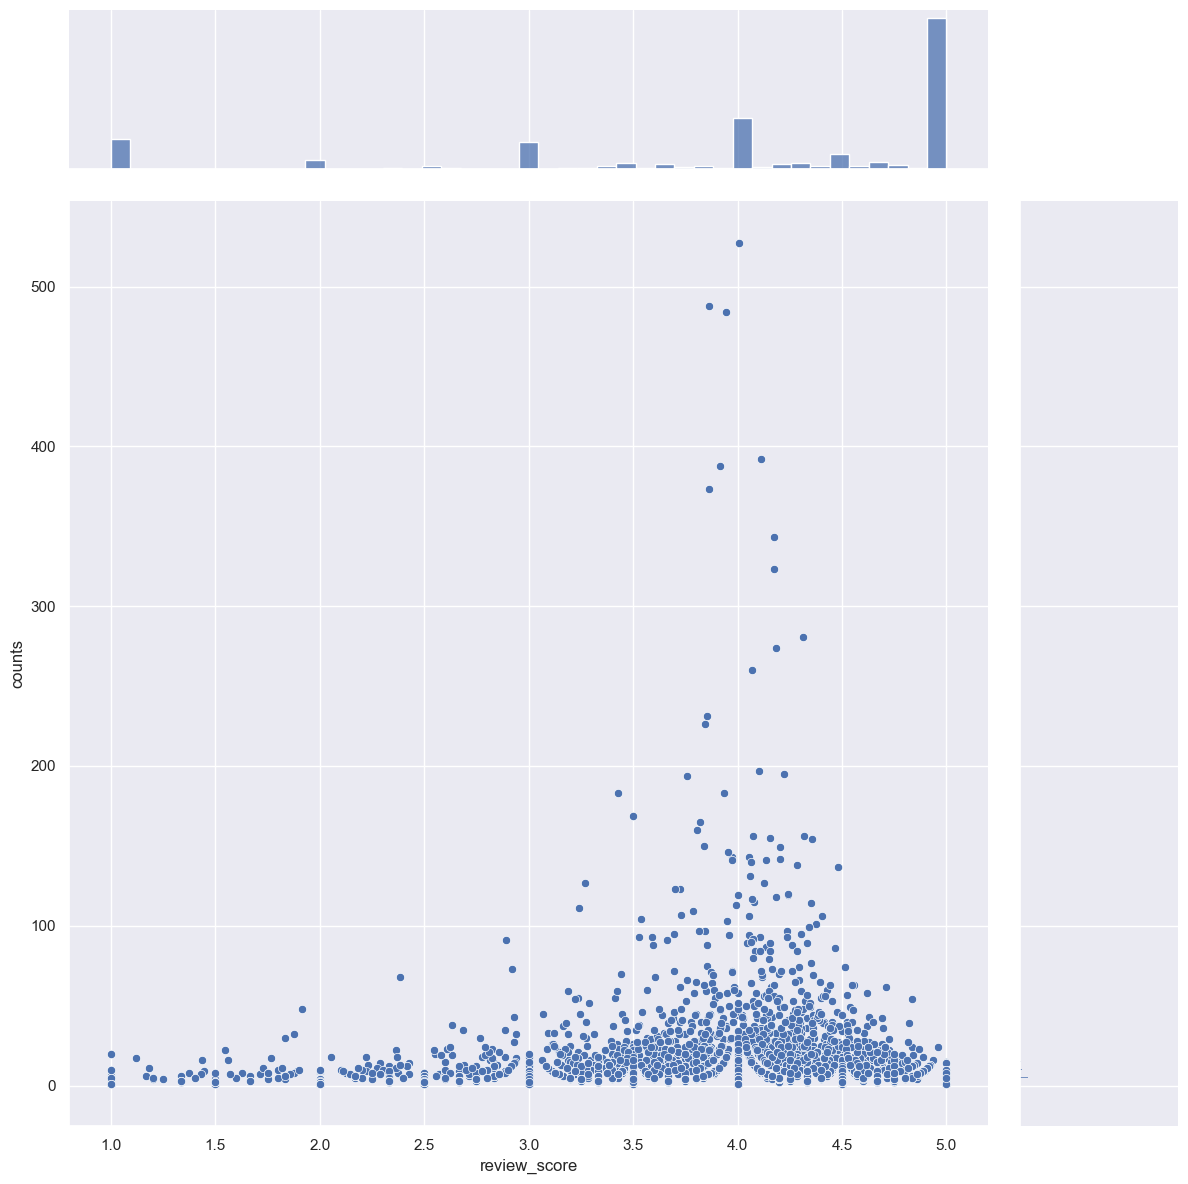

In [25]:
sb.jointplot(data = main_df, x = "review_score", y = "counts", height = 12)

In [26]:
main_df["counts"].quantile(.99)

33.0

In [27]:
for index, row in main_df.iterrows():
    if (row["counts"] > 32):
        main_df.at[index, 'Above100'] = 'Y'
    else:
        main_df.at[index, 'Above100'] = 'N'

<Axes: xlabel='review_score', ylabel='Above100'>

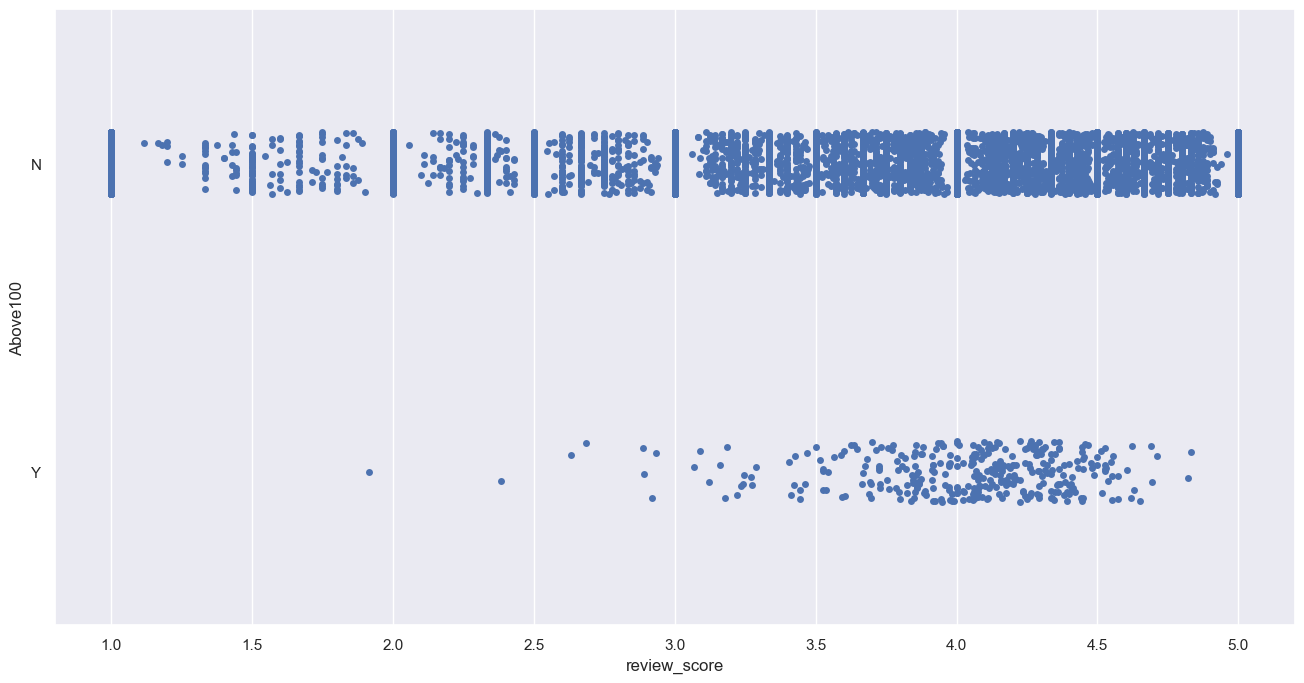

In [28]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'review_score', y = 'Above100', data = main_df)

In [29]:
main_df['counts'].describe()

count    32951.000000
mean         3.418713
std         10.619709
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        527.000000
Name: counts, dtype: float64

In [30]:
review_above_3 = main_df[main_df['review_score'] >= 3]
review_below_3 = main_df[main_df['review_score'] < 3]

In [31]:
review_above_3['counts'].describe()

count    28377.000000
mean         3.629559
std         11.349787
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        527.000000
Name: counts, dtype: float64

In [32]:
review_below_3['counts'].describe()

count    4574.000000
mean        2.110625
std         3.359892
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        91.000000
Name: counts, dtype: float64